# COGS 108 Final Project
# Effect of Campus Police & Student Demographics on Policing

## Group Members PIDs
- A12929855
- A12752756
- A12615468
- A13097514

# Introduction and Background

Studies have shown that police forces across the United States often do not mirror community demographics. When combined with the general lack of minority representation in police forces, these factors potentially lead to strained tensions and different biases within the police force. In recent years, though, both police departments and higher education institutions have pushed for greater diversity among their staff. Since police officers play large roles within their communities, they have the ability to shape their respective environments and atmosphere. Therefore, we are primarily interested in analyzing campus police since we are university students ourselves and college is our community. Thus, we focused on analyzing the racial demographic distribution between campus police and student bodies, then determining what implications this difference may have on police activities.

Drawing upon prior studies, it has been established that we generally cannot reject the null hypothesis that there is no discrimination by police officers and that race is not a factor. For example, Fryer's study delves into the use of force, showing to what extent discrimination may impact the amount of force or usage of it. In our case, we will be moreso focusing on measurable data, such as the police budget, meetings, and size -- and determining if there is any correlation due to racial differences/demographics. 

References (include a link):
- 1) "Where Police Don't Mirror Communities and Why It Matters" by Mike Maciag
    http://www.governing.com/topics/public-justice-safety/gov-police-department-diversity.html
    This article discusses how police across the nation don't mirror the demographics of those they serve, along with the impacts of police diversity (or lack of), and how to potentially improve diversity.
- 2) An Empirical Analysis of Racial Differences in Police Use of Force by Roland G. Fryer, Jr 
    http://www.nber.org/papers/w22399
    This paper examines police use of force and how race plays into this.
    
    
Our Hypothesis:    
We predict that if there is a statistically significant difference in the racial demographics between the campus police and student body, then there will be an increase in police operating budget, police size, larceny on campus, and weapons per officer. Additionally, there will be an increase in the ratio of lethal to non-lethal weapons. However, we predict there will be a decrease in the amount of meetings held between the campus police and student body as well as in the number of police officers designated to fight hate crimes. 

# Dataset Descriptions

- Dataset Name: Survey of Police Departments across the Country
- Link to the dataset: http://www.icpsr.umich.edu/cgi-bin/bob/zipcart2?path=ICPSR&study=36217&bundle=delimited&ds=1&dups=yes
- Number of observations: 861
This dataset has entries describing the police departments of 4-year universities across the United States.
It includes department demographics, budget, equipment, student contact, education level, department 
practices, and designated personnel.

- Dataset Name: College Scorecard Raw Data
- Link to dataset: https://catalog.data.gov/dataset/college-scorecard
- Number of observations: 7675
This dataset contains demographic data and statistics for accepted applicant for 7675 universities in the United States.

- Dataset Name: Campus Security and Safety
- Link to dataset: https://ope.ed.gov/campussafety/#/datafile/list
- Number of observations: 10770
This dataset contains data on crime reported at universities and by university students, providing information on the crime rate of different types of crimes and also arrests.

- Dataset Name: American Community Survey Census
- Link to dataset: https://factfinder.census.gov/faces/tableservices/jsf/pages/productview.xhtml?pid=ACS_11_1YR_CP05&prodType=table
- Number of observations: 84
This dataset provides demographic data - gender and race - on the American population, also classifying it by different states and regions.

We utilized these four datasets to compare the racial demographics of campus police departments to the
university's student population and then look at the bigger picture across the nation. We did this by merging the first three datasets to ultimately gather information about each university's location, student demographics, campus police demographics, and more in-depth information about each of these factors. We then compared differences in crime between universities with more or less representative police departments with our newly merged dataset. Finally, we employed the last dataset from the American Census to compare these college campuses to the general population demographics and see how they relate to each other -- and analyzing if regions/areas are of any interest to our data.

# Data Cleaning and Preprocessing

In [343]:
# Some simple preprocessing and importing
%matplotlib inline
import numpy as np
import pandas as pd
import scipy.stats as scs
import matplotlib.pyplot as plt
from pandas import ExcelWriter
from pandas import ExcelFile

In [344]:
# read police force data from DOJ
police_df = pd.read_csv('datasets/doj_data.tsv', sep='\t')

In [345]:
# read demographics data for 2011 and 2012 years; care about 2011
demographics_df = pd.read_csv('datasets/MERGED2011_12_PP.csv')

In [346]:
# read the dataset for all on campus arrest statistics for 2009, 2010, 2011; only care about 2011
arrests_df = pd.read_excel('datasets/Oncampusarrest091011.xls', sheetname='Sheet1')

In [347]:
# read the dataset for campus characterisics
college_char_df = pd.read_csv('datasets/college_characteristics_data.csv')

In [348]:
# read the census state demographics data set
census_df = pd.read_csv('datasets/ACS_2011_census.csv')

In [349]:
# list of state name and demographic data to retain
census_keep = ['Geography', 'Percent; HISPANIC OR LATINO AND RACE - Hispanic or Latino (of any race)',
                'Percent; HISPANIC OR LATINO AND RACE - Not Hispanic or Latino - White alone',
                'Percent; HISPANIC OR LATINO AND RACE - Not Hispanic or Latino - Black or African American alone',
                'Percent; HISPANIC OR LATINO AND RACE - Not Hispanic or Latino - American Indian and Alaska Native alone',
                'Percent; HISPANIC OR LATINO AND RACE - Not Hispanic or Latino - Asian alone',
                'Percent; HISPANIC OR LATINO AND RACE - Not Hispanic or Latino - Native Hawaiian and Other Pacific Islander alone',
                'Percent; HISPANIC OR LATINO AND RACE - Not Hispanic or Latino - Some other race alone',
                'Percent; HISPANIC OR LATINO AND RACE - Not Hispanic or Latino - Two or more races']

# clean out all the misc data
census_df = census_df[census_keep]
# rename columns
census_df.columns = ['STATE', 'STATE_HISP', 'STATE_WHITE', 'STATE_BLACK', 'STATE_AMER_IND', 'STATE_ASIAN', 'STATE_PI',
                     'STATE_OTHER_ALONE', 'STATE_TWO_PLUS']

In [350]:
# create a column for Asain Pacific Islander by combining state-asain and state-pi
census_df['STATE_API'] = census_df['STATE_ASIAN'] + census_df['STATE_PI']
# remove state-asain and state-pi
census_df = census_df.drop('STATE_ASIAN', axis=1)
census_df = census_df.drop('STATE_PI', axis=1)

# create a column for other that includes other-alone and two plus 
census_df['STATE_OTHER'] = census_df['STATE_OTHER_ALONE'] + census_df['STATE_TWO_PLUS']
#remove other alone and two plus races
census_df = census_df.drop('STATE_OTHER_ALONE', axis=1)
census_df = census_df.drop('STATE_TWO_PLUS', axis=1)

In [351]:
# use dictionary to convert full state names to abbreviation
us_state_abbrev = {
    'Alabama': 'AL',
    'Alaska': 'AK',
    'Arizona': 'AZ',
    'Arkansas': 'AR',
    'California': 'CA',
    'Colorado': 'CO',
    'Connecticut': 'CT',
    'Delaware': 'DE',
    'Florida': 'FL',
    'Georgia': 'GA',
    'Hawaii': 'HI',
    'Idaho': 'ID',
    'Illinois': 'IL',
    'Indiana': 'IN',
    'Iowa': 'IA',
    'Kansas': 'KS',
    'Kentucky': 'KY',
    'Louisiana': 'LA',
    'Maine': 'ME',
    'Maryland': 'MD',
    'Massachusetts': 'MA',
    'Michigan': 'MI',
    'Minnesota': 'MN',
    'Mississippi': 'MS',
    'Missouri': 'MO',
    'Montana': 'MT',
    'Nebraska': 'NE',
    'Nevada': 'NV',
    'New Hampshire': 'NH',
    'New Jersey': 'NJ',
    'New Mexico': 'NM',
    'New York': 'NY',
    'North Carolina': 'NC',
    'North Dakota': 'ND',
    'Ohio': 'OH',
    'Oklahoma': 'OK',
    'Oregon': 'OR',
    'Pennsylvania': 'PA',
    'Rhode Island': 'RI',
    'South Carolina': 'SC',
    'South Dakota': 'SD',
    'Tennessee': 'TN',
    'Texas': 'TX',
    'Utah': 'UT',
    'Vermont': 'VT',
    'Virginia': 'VA',
    'Washington': 'WA',
    'West Virginia': 'WV',
    'Wisconsin': 'WI',
    'Wyoming': 'WY',
    'Puerto Rico': 'PR',
    'District of Columbia': 'DC'
}

def state_abbrev(state):
    return us_state_abbrev[state]

census_df['STATE'] = census_df['STATE'].apply(state_abbrev)

In [352]:
# list of columns to keep in college characteristics data
college_char_keep = ['super_opeid','name', 'region', 'tier', 'tier_name', 'type', 'iclevel', 'barrons', 'hbcu', 'scorecard_median_earnings_2011']

# only keep these columsn - drop rest
college_char_df = college_char_df[college_char_keep] 
# rename opeid column
college_char_df.columns = ['OPEID', 'name', 'region', 'tier', 'tier_name', 'type', 'iclevel', 'barrons', 'hbcu', 'scorecard_median_earnings_2011']

In [353]:
# list of columns to keep in police data
policeKeep = ['IPEDS_ID', 'Q03_1', 'Q03_5', 'Q05_A_FT', 'Q06_A', 'Q06_B', 'Q06_C',
                 'Q06_D', 'Q06_E', 'Q21', 'Q38_B', 'Q42_M', 'Q47A_A', 'Q47A_B', 'Q47A_C', 'Q47A_D', 'Q47A_E', 'Q47A_F',
                 'Q47A_G', 'Q47A_H', 'Q47A_I', 'Q47A_J', 'Q47A_K', 'Q47A_L', 'Q52_A', 'Q52_G', 'Q52_N', 'Q56_I', 'Q56_R',
                 'Q59']
# only keep these columns - drop rest
police_df = police_df[policeKeep]
# rename the columns 
police_df.columns = ['IPEDS_ID', 'CAMPUS_POLICE', 'PRIVATE_POLICE', 'POLICE_POP', 'POLICE_WHITE', 
                     'POLICE_BLACK', 'POLICE_HISP', 'POLICE_AMER_IND', 'POLICE_API', 'OPER_BUDG', 'REQ_EDUCATION', 
                     'CULT_DIV', 'Q47A_A', 'Q47A_B', 'Q47A_C', 'Q47A_D', 'Q47A_E', 'Q47A_F', 'Q47A_G', 'Q47A_H', 'Q47A_I', 
                     'Q47A_J', 'Q47A_K','Q47A_L', 'MEET_ADVOCACY', 'MEET_S_GOV', 'MEET_S_ORG', 'HATE_CRIME_PERSON', 
                     'VIC_ASSIST_PERSON', 'CSO']

In [354]:
# replace any cells with empty strings/'-8888' to have NaN objects instead 
police_df.replace(' ', np.nan, inplace=True)
police_df.replace('-8888', np.nan, inplace=True)

# drop all rows that contain cells with null values
police_df.dropna(subset=['POLICE_WHITE', 'POLICE_BLACK', 'POLICE_HISP', 'POLICE_AMER_IND', 'POLICE_API'], inplace=True)

#convert all police numbers to numberic values 
police_df = police_df.apply(pd.to_numeric)
# create an other column to calculate how many police don't fit into the given racial categories
police_df['POLICE_OTHER'] = police_df['POLICE_POP'] - police_df['POLICE_WHITE'] - police_df['POLICE_BLACK'] - police_df['POLICE_HISP'] - police_df['POLICE_API'] - police_df['POLICE_AMER_IND']

In [355]:
# drop rows that have police demographics that add up to 0
police_df = police_df[(police_df.POLICE_WHITE != 0) | (police_df.POLICE_BLACK != 0)]

In [356]:
#list of columns in demographics data to keep
demographicsKeep = ['UNITID', 'OPEID', 'OPEID6', 'INSTNM', 'CITY', 'STABBR', 'CONTROL', 'UGDS', 'REGION', 
                'UGDS_WHITE', 'UGDS_BLACK', 'UGDS_HISP', 'UGDS_ASIAN', 'UGDS_AIAN', 'UGDS_NHPI']
# only keep the specified columns in the dataframe
demographics_df = demographics_df[demographicsKeep]

In [357]:
#drop any rows will null values
demographics_df = demographics_df.dropna()
#rename columns
demographics_df.rename(columns={'INSTNM': 'NAME', 'STABBR': 'STATE', 'CONTROL': 'PUBLIC/NONPROFIT/PROFIT', 'UGDS': "STUDENT_POP",
                                'UGDS_WHITE': 'WHITE', 'UGDS_BLACK': 'BLACK', 'UGDS_HISP': 'HISP', 'UGDS_ASIAN': "ASIAN", 
                                'UGDS_AIAN': "AMER_IND", 'UGDS_NHPI': 'PACIFIC_ISLANDER'}, inplace=True)

In [358]:
#combine the asian and pacific islander columns
demographics_df['API'] = demographics_df['ASIAN'] + demographics_df['PACIFIC_ISLANDER']
# drop the separate asian and PI columns
demographics_df = demographics_df.drop('ASIAN', axis=1)
demographics_df = demographics_df.drop('PACIFIC_ISLANDER', axis=1)

# create new column that has "other" category for population demographics not already listed
demographics_df["OTHER"] = 1 - demographics_df['WHITE'] - demographics_df['BLACK'] - demographics_df['HISP'] - demographics_df['API'] - demographics_df['AMER_IND'] 

In [359]:
# convert police race columns from counts to percentages based on their population
police_df['POLICE_WHITE'] = (police_df['POLICE_WHITE'] / police_df['POLICE_POP']) * 100
police_df['POLICE_BLACK'] = (police_df['POLICE_BLACK'] / police_df['POLICE_POP']) * 100
police_df['POLICE_HISP'] = (police_df['POLICE_HISP'] / police_df['POLICE_POP']) * 100
police_df['POLICE_API'] = (police_df['POLICE_API'] / police_df['POLICE_POP']) * 100
police_df['POLICE_AMER_IND'] = (police_df['POLICE_AMER_IND'] / police_df['POLICE_POP']) * 100
police_df['POLICE_OTHER'] = (police_df['POLICE_OTHER'] / police_df['POLICE_POP']) * 100
police_demo = ['POLICE_WHITE','POLICE_BLACK', 'POLICE_HISP', 'POLICE_AMER_IND','POLICE_API', 'POLICE_OTHER']

# also convert student demographics to percentages out of 100
demographics_df['WHITE'] = demographics_df['WHITE'] * 100
demographics_df['BLACK'] = demographics_df['BLACK'] * 100
demographics_df['HISP'] = demographics_df['HISP'] * 100
demographics_df['API'] = demographics_df['API'] * 100
demographics_df['AMER_IND'] = demographics_df['AMER_IND'] * 100
demographics_df['OTHER'] = demographics_df['OTHER'] * 100

# Nationwide Demographics

The following histograms will give us insight into the distribution of race at universities, university police departments, and at the nationwide level. 

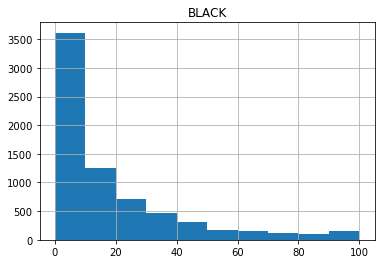

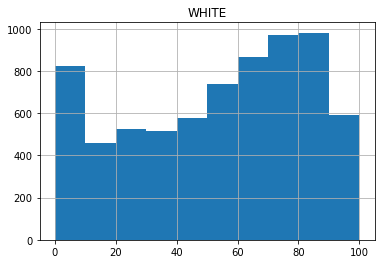

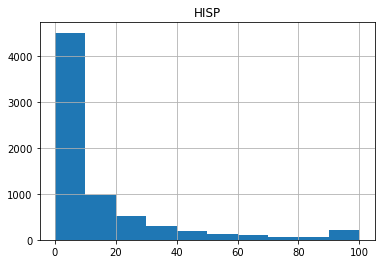

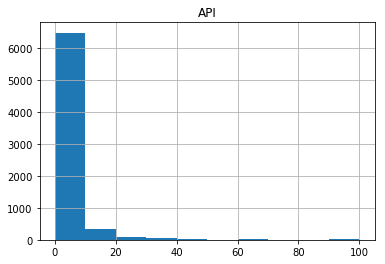

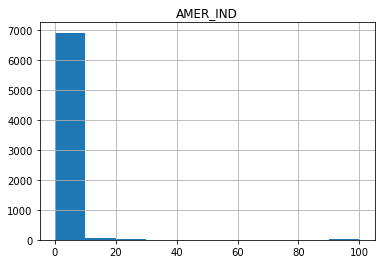

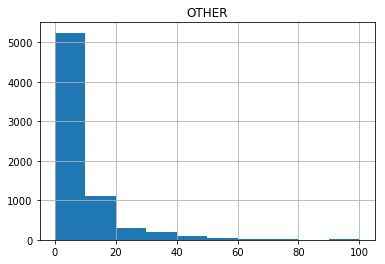

In [360]:
# histogram racial demographics of all American universities
black_student_hist = demographics_df.hist(column='BLACK')
white_student_hist = demographics_df.hist(column='WHITE')
hisp_student_hist = demographics_df.hist(column='HISP')
api_student_hist = demographics_df.hist(column='API')
amer_ind_student_hist = demographics_df.hist(column='AMER_IND')
other_student_hist = demographics_df.hist(column='OTHER')

The histograms show that most colleges across the country are primarily white. This could prove to be a confounding variable in future analysis. 

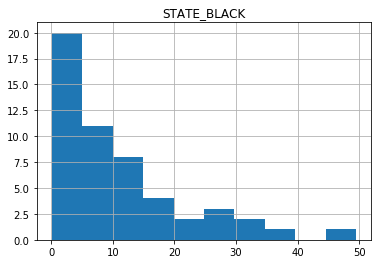

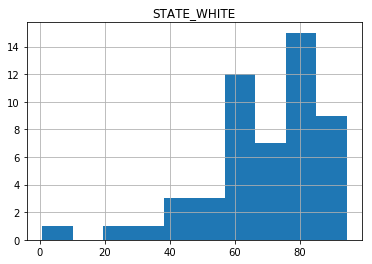

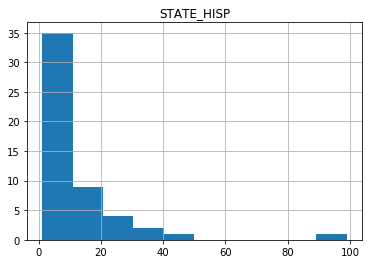

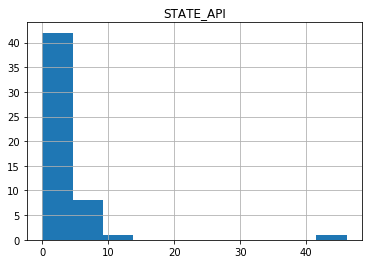

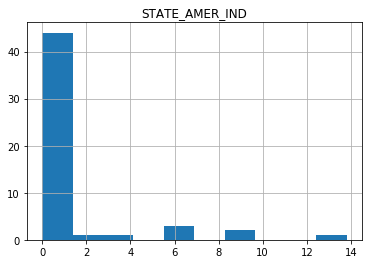

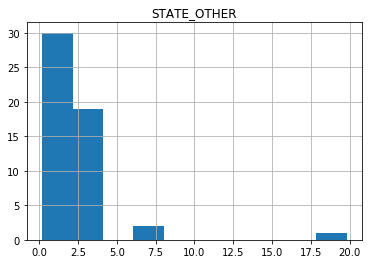

In [361]:
# histogram the nation's demographics
census_black_hist = census_df.hist(column='STATE_BLACK')
census_white_hist = census_df.hist(column='STATE_WHITE')
census_hisp_hist = census_df.hist(column='STATE_HISP')
census_api_hist = census_df.hist(column='STATE_API')
census_amer_ind_hist = census_df.hist(column='STATE_AMER_IND')
census_other_hist = census_df.hist(column='STATE_OTHER')
#pd.scatter_matrix(census_df) 

We construct a histogram from nationwide demographics so we can inspect if there is a closer relation between campus police demographics and the U.S. demographics (as a whole) than between campus police and student racial demographics.

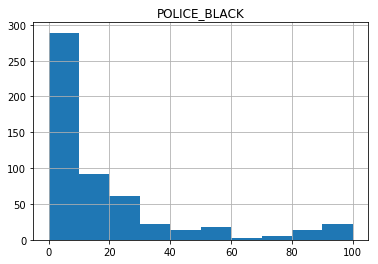

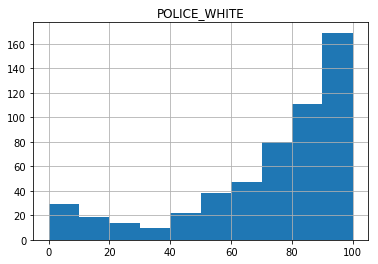

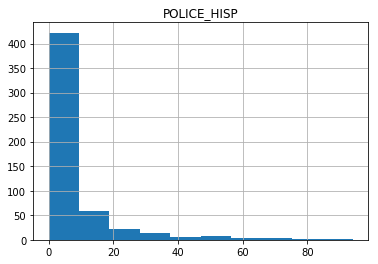

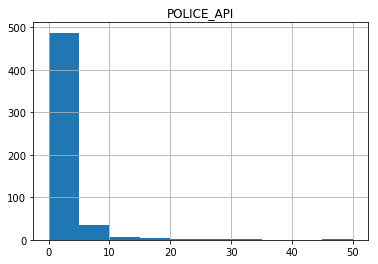

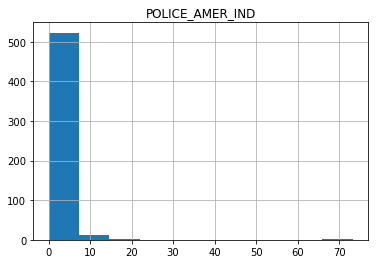

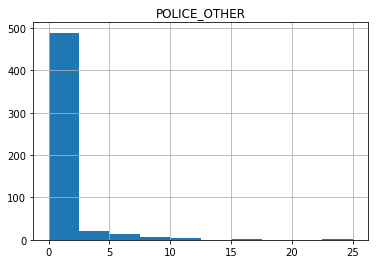

In [362]:
# histogram the campus police demograhics
police_black_hist = police_df.hist(column='POLICE_BLACK')
police_white_hist = police_df.hist(column='POLICE_WHITE')
police_hisp_hist = police_df.hist(column='POLICE_HISP')
police_api_hist = police_df.hist(column='POLICE_API')
police_amer_ind_hist = police_df.hist(column='POLICE_AMER_IND')
police_other_hist = police_df.hist(column='POLICE_OTHER')
#pd.scatter_matrix(police_df[police_demo])

The campus police demographics histograms show that campus police nationwide is primarily composed of white officers.

In [363]:
#drop unneeded columns and only keep those we want
arrests_df = arrests_df[['UNITID_P', 'WEAPON11', 'DRUG11', 'LIQUOR11']]
#rename the columns in arrests_df
arrests_df.columns = ['UNITID', 'WEAPON_ARREST', 'DRUG_ARREST', 'LIQUOR_ARREST']

In [364]:
# keep rows that have a UNITID that end with 001 since these will be the main campuses 
arrests_df = arrests_df.loc[arrests_df['UNITID'].astype(str).str[-3:] == '001']

In [365]:
#delete last three characters of UNITID
arrests_df["UNITID"] = arrests_df['UNITID'].astype(str).str[0:6].astype(int)

In [366]:
#create a new column with sum of all arrests
arrests_df["TOTAL_ARREST"] = arrests_df["WEAPON_ARREST"] + arrests_df["DRUG_ARREST"] + arrests_df["LIQUOR_ARREST"]

In [367]:
# merge the demographics and police datasets based on their school ID number
df = pd.merge(demographics_df, police_df, left_on="UNITID", right_on="IPEDS_ID", how="inner")

In [368]:
#merge the arrests data with the rest 
df = pd.merge(df, arrests_df, on="UNITID", how="inner")

# Racial Diversity Index (RDI)
Utilized to measure how racially representative a campus police force is of the student body. Higher RDI signifies less representation between campus police and the students.
Calculated by converting each demographic distribution to a ratio, then taking the sum of the squared differences between campus demographics and police forces. Took square root of the sum to end up with more managable number.

In [369]:
# create new column in the dataframe to store the calculation for racial difference: RDI
df['RDI'] = 0

In [370]:
# iterate through rows of the dataframe
for i, row in df.iterrows():
    # police demographics should come from these respective columns
    policelist = [row['POLICE_WHITE'], row['POLICE_BLACK'], row['POLICE_HISP'], row['POLICE_AMER_IND'], row['POLICE_API'], row['POLICE_OTHER']]
    # college student demographics should come from these respective columns
    collegelist = [row['WHITE'], row['BLACK'], row['HISP'], row['AMER_IND'], row['API'], row['OTHER']]
    # the types of rows we should have in the dataframe
    index = ['WHITE', 'BLACK', 'HISP', 'AMER_IND', 'API', 'OTHER']
    # create the actual dataframe
    demographics = pd.DataFrame(index = index, columns= ['STUDENTS', 'POLICE'])
    demographics['STUDENTS'] = collegelist
    demographics['POLICE'] = policelist
    
    # local variable to store summation of our difference calculation statistic
    sum = 0
    # take each racial category for that school and subtract the police ratio from student ratio, then square -- sum all these together
    for index, row1 in demographics.iterrows():
        sum += ((row1['STUDENTS'] - row1['POLICE'])**2)
    # square root final sum to make it more readable
    sum = sum ** (0.5)
    # store value back into respective cell in the RDI column
    df.loc[i, 'RDI'] = sum

In [371]:
# merge college characteristics data with the rest of the data using the OPEID
char_df = pd.merge(df, college_char_df, left_on="OPEID6", right_on="OPEID", how="inner")

In [372]:
# merge the college data with each college's state census data
cols_to_use = census_df.columns.difference(char_df.columns)
char_df = pd.merge(char_df, census_df, on='STATE', how='inner')

# Calculate RDI stats for future comparisons 

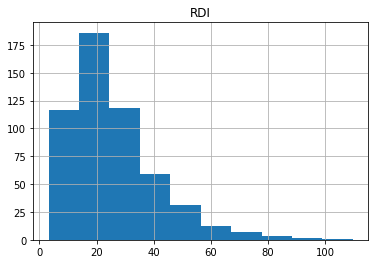

In [373]:
# average rdi
avg_rdi = df['RDI'].mean()
# standard deviation rdi
std_rdi = df['RDI'].std()
# rdi histogram
rdi_hist = df.hist(column='RDI')

# get specific perctile values for the rdi
rdi_90_perc = df['RDI'].quantile(.9)
rdi_75_perc = df['RDI'].quantile(.75)
rdi_25_perc = df['RDI'].quantile(.25)
rdi_10_perc = df['RDI'].quantile(.1)

# RDI Percentile Histograms
Histograms for racial distribution at different RDI percentiles to observe if there are significant differences in racial distribution when police departments are more or less represenatives. 

Racial Demographic Histograms of universities in the top 10th percentile of RDI


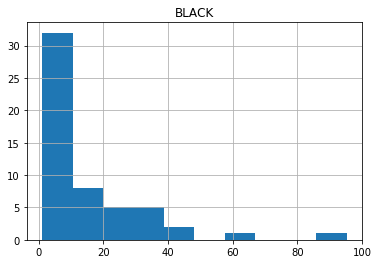

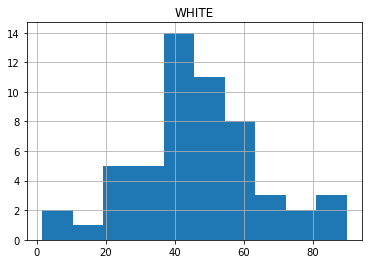

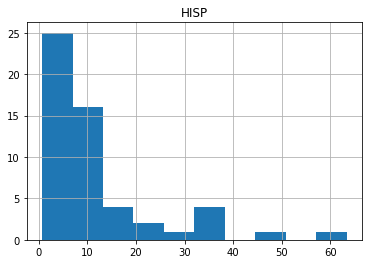

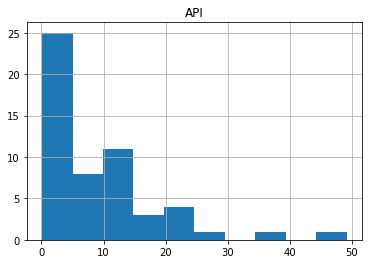

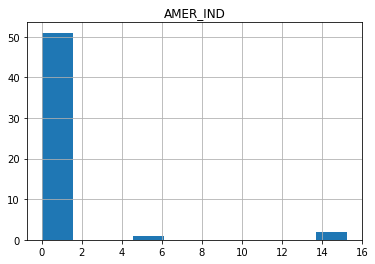

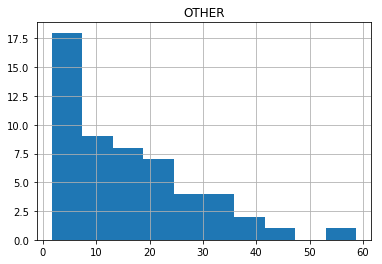

In [374]:
# histogram the demographics of students at universities with RDI in the top 10th percentile
print('Racial Demographic Histograms of universities in the top 10th percentile of RDI')
p90_rdi_black_student_hist = df[df.RDI > rdi_90_perc].hist(column='BLACK')
p90_rdi_white_student_hist = df[df.RDI > rdi_90_perc].hist(column='WHITE')
p90_rdi_hisp_student_hist = df[df.RDI > rdi_90_perc].hist(column='HISP')
p90_rdi_api_student_hist = df[df.RDI > rdi_90_perc].hist(column='API')
p90_rdi_amer_ind_student_hist = df[df.RDI > rdi_90_perc].hist(column='AMER_IND')
p90_rdi_other_student_hist = df[df.RDI > rdi_90_perc].hist(column='OTHER')

Racial Demographic Histograms of universities in the top 25th percentile of RDI


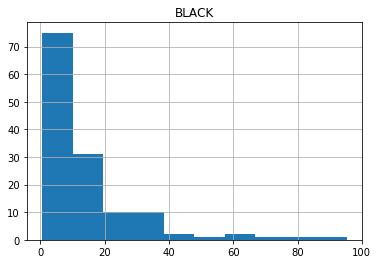

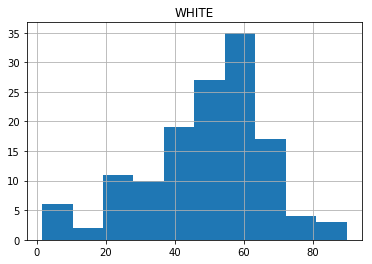

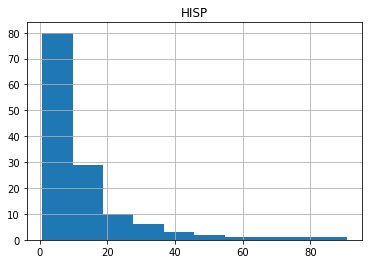

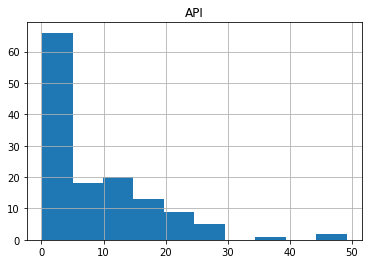

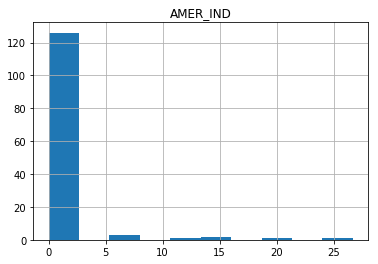

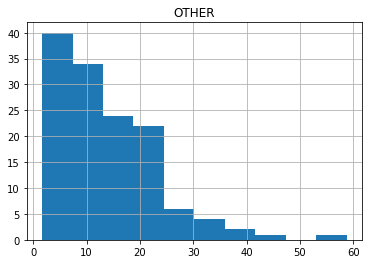

In [375]:
# histogram the demographics of students at universities with RDI in the top 25th percentile
print('Racial Demographic Histograms of universities in the top 25th percentile of RDI')
p75_rdi_black_student_hist = df[df.RDI > rdi_75_perc].hist(column='BLACK')
p75_rdi_white_student_hist = df[df.RDI > rdi_75_perc].hist(column='WHITE')
p75_rdi_hisp_student_hist = df[df.RDI > rdi_75_perc].hist(column='HISP')
p75_rdi_api_student_hist = df[df.RDI > rdi_75_perc].hist(column='API')
p75_rdi_amer_ind_student_hist = df[df.RDI > rdi_75_perc].hist(column='AMER_IND')
p75_rdi_other_student_hist = df[df.RDI > rdi_75_perc].hist(column='OTHER')

Racial Demographic Histograms of universities in the bottom 25th percentile of RDI


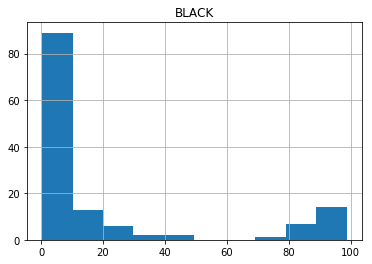

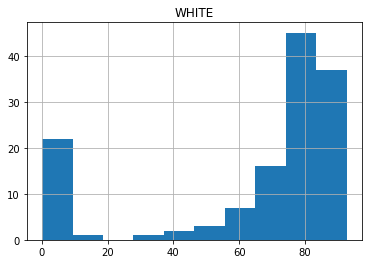

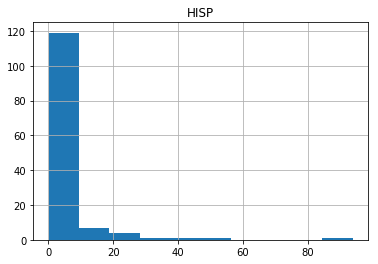

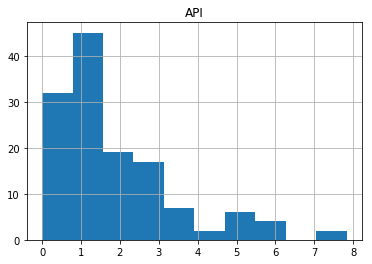

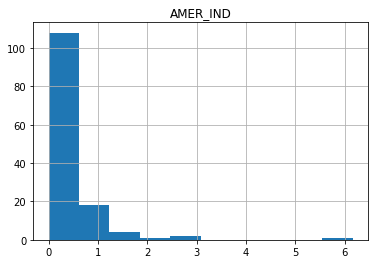

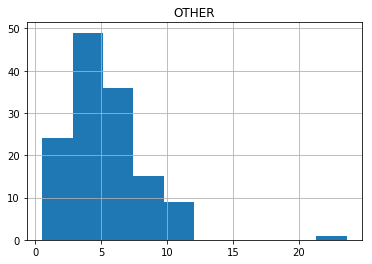

In [376]:
# histogram the demographics of students at universities with RDI in the bottom 25th percentile
print('Racial Demographic Histograms of universities in the bottom 25th percentile of RDI')
p25_rdi_black_student_hist = df[df.RDI < rdi_25_perc].hist(column='BLACK')
p25_rdi_white_student_hist = df[df.RDI < rdi_25_perc].hist(column='WHITE')
p25_rdi_hisp_student_hist = df[df.RDI < rdi_25_perc].hist(column='HISP')
p25_rdi_api_student_hist = df[df.RDI < rdi_25_perc].hist(column='API')
p25_rdi_amer_ind_student_hist = df[df.RDI < rdi_25_perc].hist(column='AMER_IND')
p25_rdi_other_student_hist = df[df.RDI < rdi_25_perc].hist(column='OTHER')

Racial Demographic Histograms of universities in the bottom 25th percentile of RDI


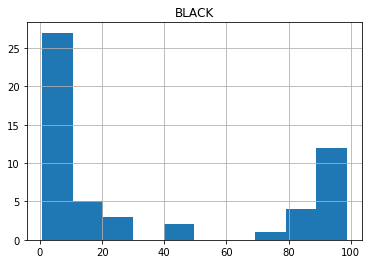

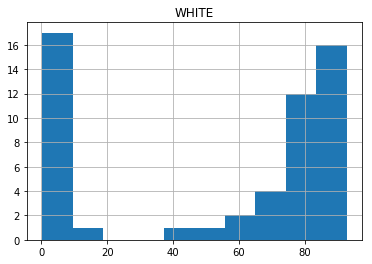

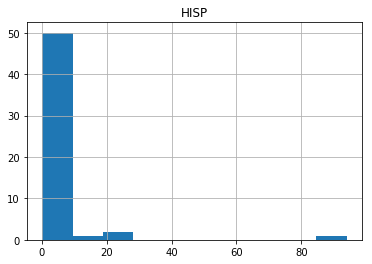

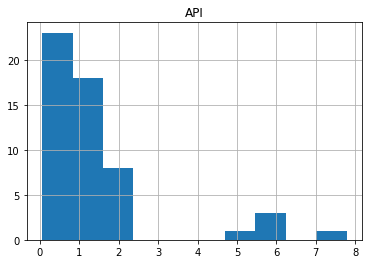

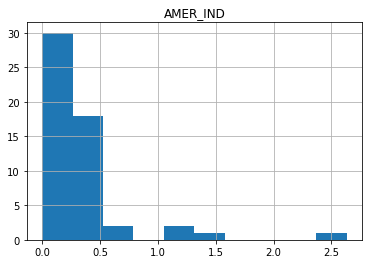

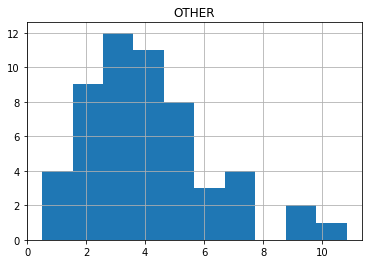

In [377]:
# histogram the demographics of students at universities with RDI in the bottom 25th percentile
print('Racial Demographic Histograms of universities in the bottom 25th percentile of RDI')
p10_rdi_black_student_hist = df[df.RDI < rdi_10_perc].hist(column='BLACK')
p10_rdi_white_student_hist = df[df.RDI < rdi_10_perc].hist(column='WHITE')
p10_rdi_hisp_student_hist = df[df.RDI < rdi_10_perc].hist(column='HISP')
p10_rdi_api_student_hist = df[df.RDI < rdi_10_perc].hist(column='API')
p10_rdi_amer_ind_student_hist = df[df.RDI < rdi_10_perc].hist(column='AMER_IND')
p10_rdi_other_student_hist = df[df.RDI < rdi_10_perc].hist(column='OTHER')

After inspecting police demographics at the bottom 10th percentile, there was an interesting break from previous trends where the largest bin is below twenty percent. We decided to inspect whether historically black colleges and universities (HBCUs) make up a significant portion of that subset.

In [378]:
print(char_df[char_df.hbcu == 1].shape)
pd25_hbcu = char_df[char_df.RDI < rdi_25_perc]
print(pd25_hbcu[pd25_hbcu.hbcu == 1].shape)

(33, 67)
(19, 67)


There are 19 of the 33 HBCUs that are present in the bottom 25th percentile.

# Budget Analysis

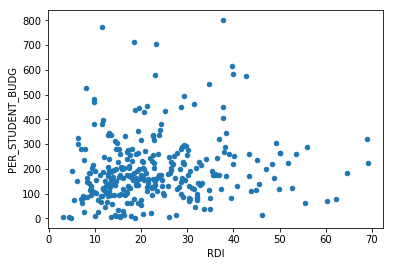

In [379]:
#construct separate dataframe for analyzing budget
df_budget = df[['NAME', 'STUDENT_POP', 'PUBLIC/NONPROFIT/PROFIT', 'OPER_BUDG', 'RDI', 'CAMPUS_POLICE']]
# drop any rows that don't have data
df_budget = df_budget.dropna()
# drop any rows with budgets less than 0
df_budget = df_budget[df_budget.OPER_BUDG > 0]
# create new column calculating how much money per student is in the budget
df_budget['PER_STUDENT_BUDG'] = df_budget["OPER_BUDG"] / df_budget['STUDENT_POP']
# construct another dataframe for public university budgets
df_budget_pub = df_budget.loc[df_budget['PUBLIC/NONPROFIT/PROFIT'] == 1]
# drop outliers with exorbitant budgets per student
df_budget_pub = df_budget_pub.loc[df_budget_pub.PER_STUDENT_BUDG < 1900]

df_budget_pub.plot.scatter(x='RDI', y='PER_STUDENT_BUDG')

In the scatter plot, there are no points towards a positive correlation between RDI and budget.

# Arrests/Crime Analysis

In [380]:
#construct separate dataframe for analyzing arrests
df_arrests = df[['NAME', 'STUDENT_POP', 'PUBLIC/NONPROFIT/PROFIT', 'WEAPON_ARREST', 'DRUG_ARREST',
                 'LIQUOR_ARREST', 'TOTAL_ARREST', 'RDI', 'CAMPUS_POLICE']]

#drop any rows with null data
df_arrests = df_arrests.dropna()
# create column calculating arrests per student
df_arrests['PER_STDT_TOTAL_ARREST'] = df_arrests['TOTAL_ARREST'] / df_arrests['STUDENT_POP']
df_arrests['PER_STDT_DRUG_ARREST'] = df_arrests['DRUG_ARREST'] / df_arrests['STUDENT_POP']
df_arrests['PER_STDT_WEAPON_ARREST'] = df_arrests['WEAPON_ARREST'] / df_arrests['STUDENT_POP']
df_arrests['PER_STDT_LIQ_ARREST'] = df_arrests['LIQUOR_ARREST'] / df_arrests['STUDENT_POP']

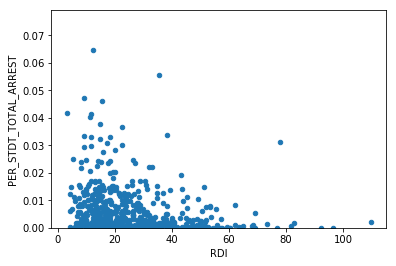

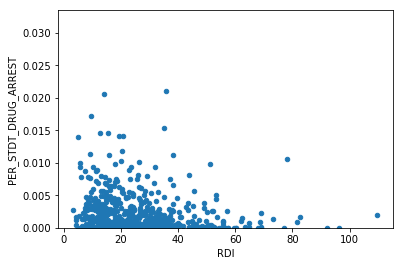

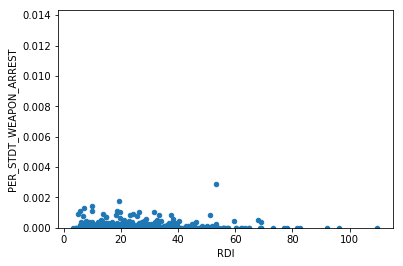

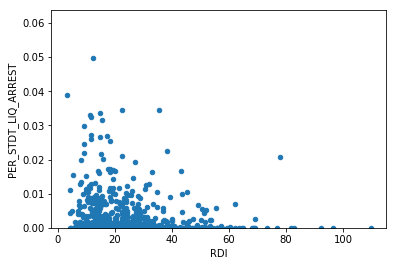

In [381]:
#scatter plot of RDI to per student arrest
df_arrests.plot.scatter(x='RDI', y='PER_STDT_TOTAL_ARREST', ylim=0)
df_arrests.plot.scatter(x='RDI', y='PER_STDT_DRUG_ARREST', ylim=0)
df_arrests.plot.scatter(x='RDI', y='PER_STDT_WEAPON_ARREST', ylim=0)
df_arrests.plot.scatter(x='RDI', y='PER_STDT_LIQ_ARREST', ylim=0)

From the scatter plots, it is difficult to discern a relationshp between RDI and the arrests of students.

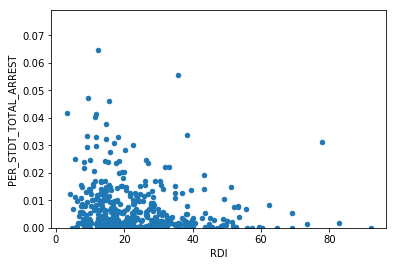

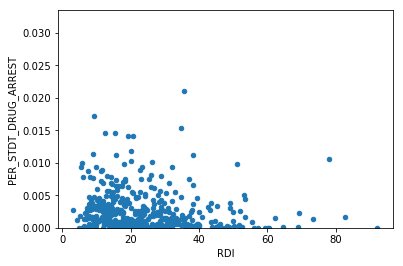

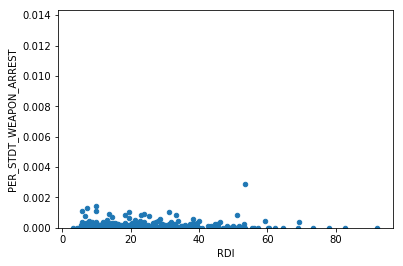

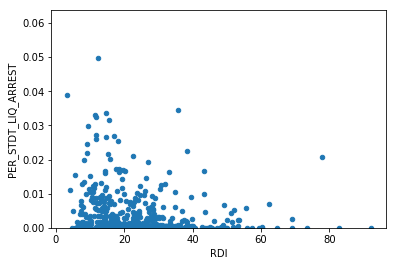

In [382]:
# construct a separate dataframe for public university budgets
df_arrests_pub = df_arrests.loc[df_arrests['PUBLIC/NONPROFIT/PROFIT'] == 1]

#scatter plot of RDI to per student arrest at public instns
df_arrests_pub.plot.scatter(x='RDI', y='PER_STDT_TOTAL_ARREST', ylim=0)
df_arrests_pub.plot.scatter(x='RDI', y='PER_STDT_DRUG_ARREST', ylim=0)
df_arrests_pub.plot.scatter(x='RDI', y='PER_STDT_WEAPON_ARREST', ylim=0)
df_arrests_pub.plot.scatter(x='RDI', y='PER_STDT_LIQ_ARREST', ylim=0)

Removing private institutions does not significantly affect the scatter plots either.

# Stats pertaining to police staff and practices

In [383]:
# construct a dataframes for analyzing specialized staff
df_staff = df[['NAME', 'STUDENT_POP', 'PUBLIC/NONPROFIT/PROFIT', 'HATE_CRIME_PERSON', 'VIC_ASSIST_PERSON', 'CSO', 'RDI', 'CAMPUS_POLICE']]
# construct a dataframe for analyzing practices
df_prac = df[['NAME', 'STUDENT_POP', 'PUBLIC/NONPROFIT/PROFIT', 'MEET_ADVOCACY', 'MEET_S_GOV',
              'MEET_S_ORG', 'RDI', 'CAMPUS_POLICE']]

In [384]:
# average rdi for univsersities with at least one of each specialized staff
avg_staff = (df_staff.dropna(0)).mean()
#average for universities without specialized staff
avg_no_staff = df_staff[df_staff.filter(items=['HATE_CRIME_PERSON', 'VIC_ASSIST_PERSON', 'CSO']).isnull().any(1)].mean()

In [385]:
# average rdi for universites with student group meetings
avg_prac = (df_prac.dropna(0)).mean()
# average rdi for universities without student group meetings
avg_no_prac = (df_prac[df_prac.filter(items=['MEET_ADVOCACY', 'MEET_S_GOV', 'MEET_S_ORG']).isnull().any(1)]).mean()

In [386]:
print('the average values for universities with one of each specialized staff')
print(avg_staff, '\n')
print('the average values for universities with no specialized staff')
print(avg_no_staff, '\n')
print('the average values for universities with student meetings')
print(avg_prac, '\n')
print('the average values for universities without student meetings')
print(avg_no_prac, '\n')
print('average RDI')
print(avg_rdi, '\n')
print('standard deviation from the RDI mean')
print(std_rdi)

the average values for universities with one of each specialized staff
STUDENT_POP                12376.688347
PUBLIC/NONPROFIT/PROFIT        1.157182
HATE_CRIME_PERSON              2.411924
VIC_ASSIST_PERSON              2.211382
CSO                            1.127371
RDI                           25.376909
CAMPUS_POLICE                  1.000000
dtype: float64 

the average values for universities with no specialized staff
STUDENT_POP                4339.185629
PUBLIC/NONPROFIT/PROFIT       1.413174
HATE_CRIME_PERSON             1.000000
VIC_ASSIST_PERSON             3.000000
CSO                                NaN
RDI                          27.201264
CAMPUS_POLICE                 1.000000
dtype: float64 

the average values for universities with student meetings
STUDENT_POP                9891.748000
PUBLIC/NONPROFIT/PROFIT       1.238000
MEET_ADVOCACY                 1.374000
MEET_S_GOV                    1.158000
MEET_S_ORG                    1.144000
RDI                        

The mean RDI statistic for universities with or without specialized staff and student group meetings does not significantly differ from the national RDI mean we calculated.

For specialized staff, it may be that the student population is a more determinant factor due to a large difference in average student population between university police departments with or without it.

# Histograms: student demographics for different regions

National mean: 25.945318249452118 | National standard deviation: 15.532167977994764
Northeast mean: 27.543346584988857 | Northeast standard deviation: 14.421812724957995

Histograms of Racial dDmographics for the Northeast:


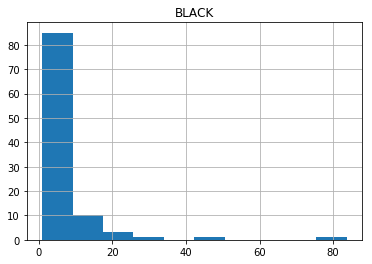

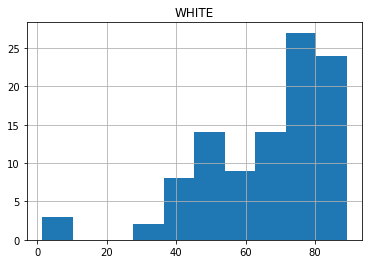

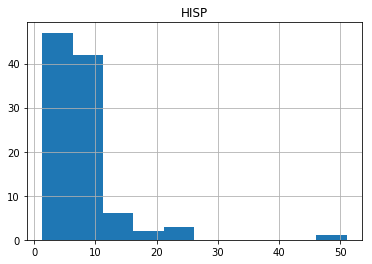

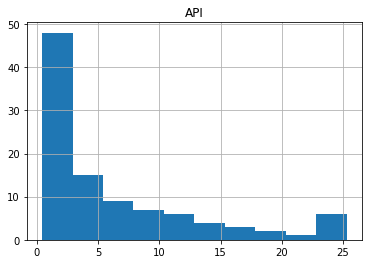

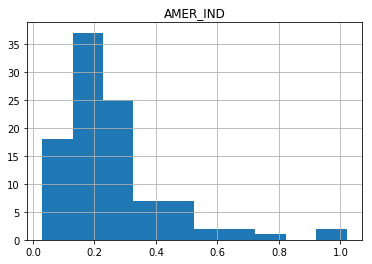

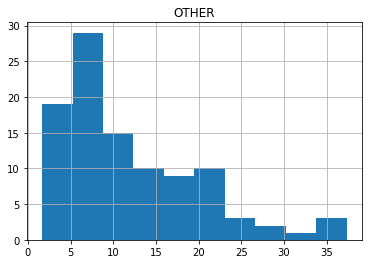

In [387]:
# histogram demographics for the northeast
char_df[char_df.region == 1].hist(column='BLACK')
char_df[char_df.region == 1].hist(column='WHITE')
char_df[char_df.region == 1].hist(column='HISP')
char_df[char_df.region == 1].hist(column='API')
char_df[char_df.region == 1].hist(column='AMER_IND')
char_df[char_df.region == 1].hist(column='OTHER')

# RDI mean and std dev for the Norththeast
north_e_rdi_avg = char_df[char_df.region == 1].RDI.mean()
north_e_rdi_std = char_df[char_df.region == 1].RDI.std()

print('National mean: ' + str(avg_rdi) + " | National standard deviation: " + str(std_rdi))
print('Northeast mean: ' + str(north_e_rdi_avg) + ' | Northeast standard deviation: ' + str(north_e_rdi_std))

print('\nHistograms of Racial dDmographics for the Northeast:')

National mean: 25.945318249452118 | National standard deviation: 15.532167977994764
Midwest mean: 22.103654337918947 | Midwest standard deviation: 12.167097009631037

Histograms of Racial Demographics for the Midwest:


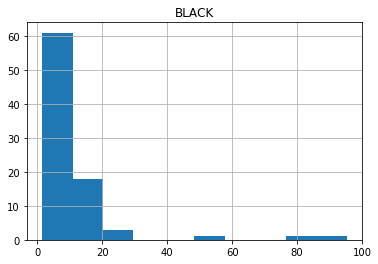

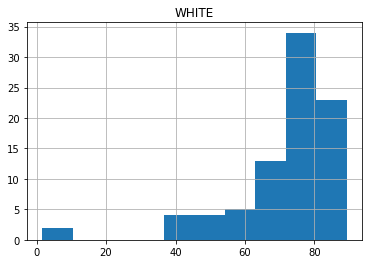

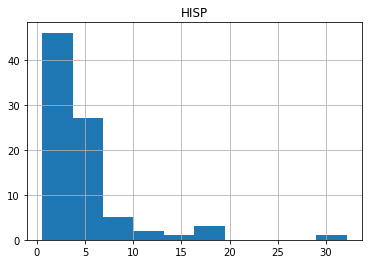

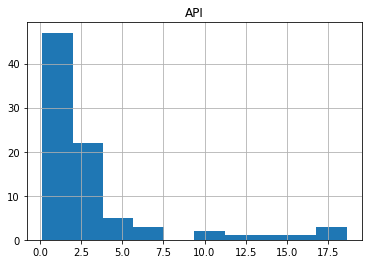

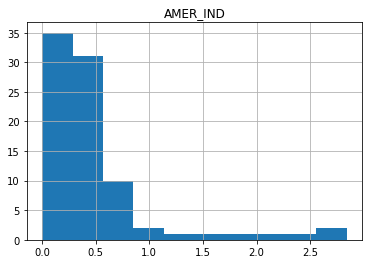

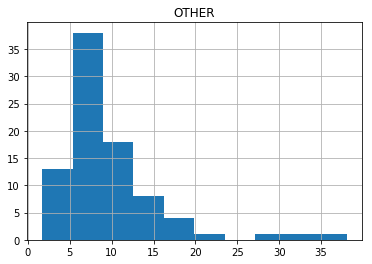

In [388]:
# histogram demographics for the midwest
char_df[char_df.region == 2].hist(column='BLACK')
char_df[char_df.region == 2].hist(column='WHITE')
char_df[char_df.region == 2].hist(column='HISP')
char_df[char_df.region == 2].hist(column='API')
char_df[char_df.region == 2].hist(column='AMER_IND')
char_df[char_df.region == 2].hist(column='OTHER')

# RDI mean and std dev for the midwest
midwest_rdi_avg = char_df[char_df.region == 2].RDI.mean()
midwest_rdi_std = char_df[char_df.region == 2].RDI.std()

print('National mean: ' + str(avg_rdi) + " | National standard deviation: " + str(std_rdi))
print('Midwest mean: ' + str(midwest_rdi_avg) + ' | Midwest standard deviation: ' + str(midwest_rdi_std))

print('\nHistograms of Racial Demographics for the Midwest:')

National mean: 25.945318249452118 | National standard deviation: 15.532167977994764
South mean: 26.42509970255009 | South standard deviation: 17.698834117111442

Histograms of Racial Demographics for the South:


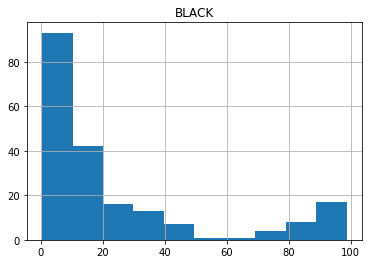

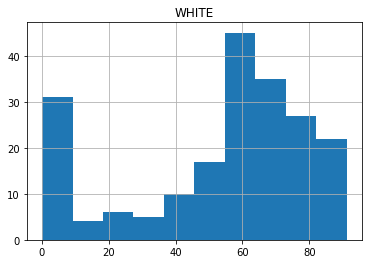

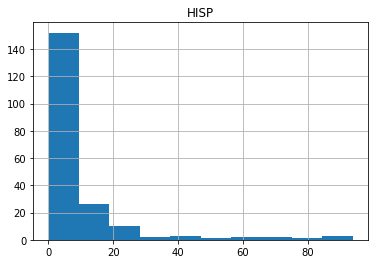

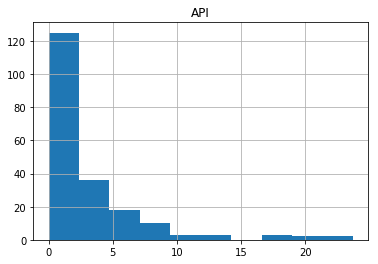

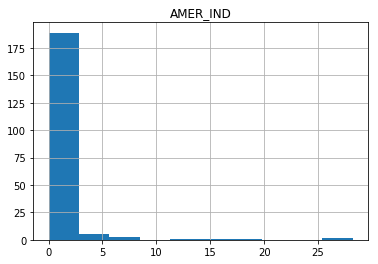

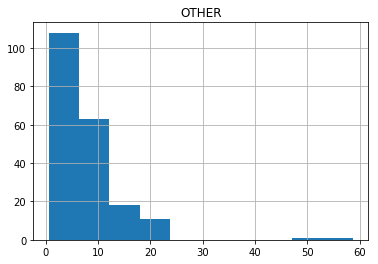

In [389]:
# histogram demographics for the south
char_df[char_df.region == 3].hist(column='BLACK')
char_df[char_df.region == 3].hist(column='WHITE')
char_df[char_df.region == 3].hist(column='HISP')
char_df[char_df.region == 3].hist(column='API')
char_df[char_df.region == 3].hist(column='AMER_IND')
char_df[char_df.region == 3].hist(column='OTHER')

# RDI mean and std dev for the midwest
south_rdi_avg = char_df[char_df.region == 3].RDI.mean()
south_rdi_std = char_df[char_df.region == 3].RDI.std()

print('National mean: ' + str(avg_rdi) + " | National standard deviation: " + str(std_rdi))
print('South mean: ' + str(south_rdi_avg) + ' | South standard deviation: ' + str(south_rdi_std))

print('\nHistograms of Racial Demographics for the South:')

National mean: 25.945318249452118 | National standard deviation: 15.532167977994764
West mean: 28.86298573167034 | West standard deviation: 11.519836668876188

Histograms of Racial Demographics for the West:


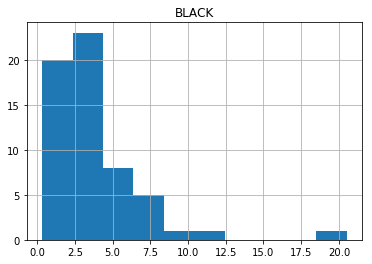

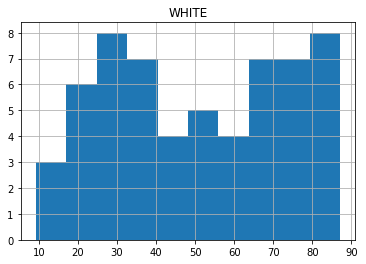

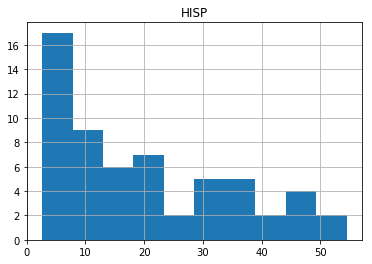

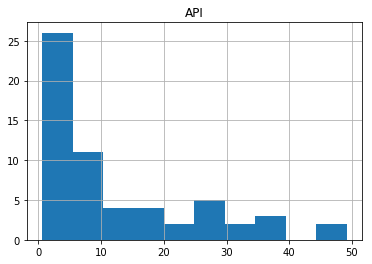

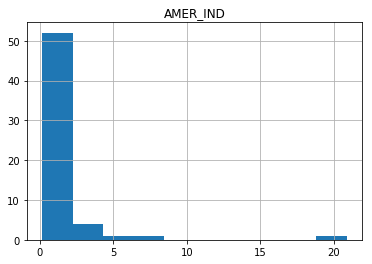

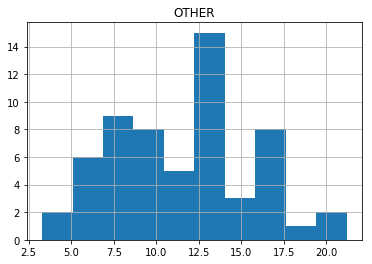

In [390]:
# histogram demographics for the west
char_df[char_df.region == 4].hist(column='BLACK')
char_df[char_df.region == 4].hist(column='WHITE')
char_df[char_df.region == 4].hist(column='HISP')
char_df[char_df.region == 4].hist(column='API')
char_df[char_df.region == 4].hist(column='AMER_IND')
char_df[char_df.region == 4].hist(column='OTHER')

# RDI mean and std dev for the midwest
west_rdi_avg = char_df[char_df.region == 4].RDI.mean()
west_rdi_std = char_df[char_df.region == 4].RDI.std()

print('National mean: ' + str(avg_rdi) + " | National standard deviation: " + str(std_rdi))
print('West mean: ' + str(west_rdi_avg) + ' | West standard deviation: ' + str(west_rdi_std))

print('\nHistograms of Racial Demographics for the West:')

Most regions have a white student distribution skewed left, although the west has a white student distribution that is bimodal. Most non-white student demographics skew right, although the west has an 'other' race distribution that is somewhat normal -- likely due to a the west's larger undocumented student population.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000016C104D7DA0>]], dtype=object)

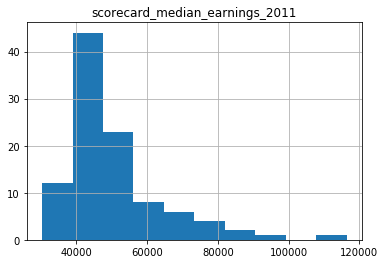

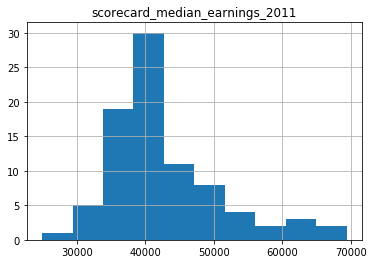

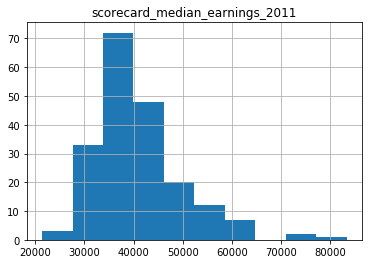

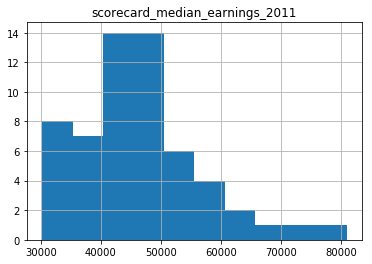

In [391]:
#northeast
char_df[char_df.region == 1].hist(column='scorecard_median_earnings_2011')
#midwest
char_df[char_df.region == 2].hist(column='scorecard_median_earnings_2011')
#south
char_df[char_df.region == 3].hist(column='scorecard_median_earnings_2011')
#west
char_df[char_df.region == 4].hist(column='scorecard_median_earnings_2011')

There are no significant differences in median income distribution across the regions.

In [394]:
print('National mean: ' + str(avg_rdi) + "\t | National standard deviation: " + str(std_rdi))
print('Northeast mean: ' + str(north_e_rdi_avg) + '\t | Northeast standard deviation: ' + str(north_e_rdi_std))
print('Midwest mean: ' + str(midwest_rdi_avg) + '\t | Midwest standard deviation: ' + str(midwest_rdi_std))
print('South mean: ' + str(south_rdi_avg) + '\t\t | South standard deviation: ' + str(south_rdi_std))
print('West mean: ' + str(west_rdi_avg) + '\t\t | West standard deviation: ' + str(west_rdi_std))

National mean: 25.945318249452118	 | National standard deviation: 15.532167977994764
Northeast mean: 27.543346584988857	 | Northeast standard deviation: 14.421812724957995
Midwest mean: 22.103654337918947	 | Midwest standard deviation: 12.167097009631037
South mean: 26.42509970255009		 | South standard deviation: 17.698834117111442
West mean: 28.86298573167034		 | West standard deviation: 11.519836668876188


None of the regions deviate more than about three standard deviations from the national average. 

# State Data Analysis

In [395]:
# get a list of all the states present in the dataframe
states = char_df.STATE.unique()
# print the national stats to compare with
print('National mean: ' + str(avg_rdi) + " | National standard deviation: " + str(std_rdi))
# initialize a dictionary with key = state, value = tuple of RDI mean, std dev, dev
state_rdi = {}

# look through each of the states
for state in states:
    # print the mean to compare with the national state
    print(str(state) + ' mean: ' + str(char_df[char_df.STATE == state].RDI.mean()))
    # store the mean, std dev, and dev for each state
    state_rdi[state] = [char_df[char_df.STATE == state].RDI.mean(), char_df[char_df.STATE == state].RDI.std(),
                            (char_df[char_df.STATE == state].RDI.mean()) - avg_rdi]
    

National mean: 25.945318249452118 | National standard deviation: 15.532167977994764
AL mean: 24.58557035188324
AR mean: 24.552619796381393
CA mean: 34.3712340763345
CO mean: 21.798041003263496
CT mean: 27.768154099076472
DE mean: 55.016555702858014
DC mean: 58.087939594941034
FL mean: 27.047518117843538
GA mean: 27.643063468729967
IL mean: 26.988579263018035
IN mean: 18.38761103248613
IA mean: 15.810296684611458
KS mean: 28.351348668411447
KY mean: 16.79838950790498
LA mean: 24.328097685900236
MD mean: 41.369954408876595
MA mean: 33.813855645977355
MI mean: 17.519378458252007
MS mean: 12.313278545352302
MO mean: 24.50463886920202
MT mean: 16.29174803198298
NV mean: 19.182099022432567
NH mean: 20.952107580486835
NJ mean: 24.018407520111907
NM mean: 28.019705920968732
NY mean: 31.08415616619432
NC mean: 24.225633299270992
ND mean: 13.736251913083949
OH mean: 20.586747680457744
OK mean: 26.744417971236373
OR mean: 28.34130493645977
PA mean: 19.976517789115643
RI mean: 39.16054448331275
SC

In [396]:
# look through each state's dev to see if anything falls outside of one std dev from the nat mean
for i in state_rdi:
    if( (abs(state_rdi[i][2]) > std_rdi) ):
        print(i, state_rdi[i])

DE [55.016555702858014, 58.606305097563016, 29.071237453405896]
DC [58.087939594941034, 40.897697692701385, 32.14262134548892]


Only one state falls outside of one deviation of the national mean: Delaware. The other data point is the District of Columbia. 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000016C0EAE4B38>]], dtype=object)

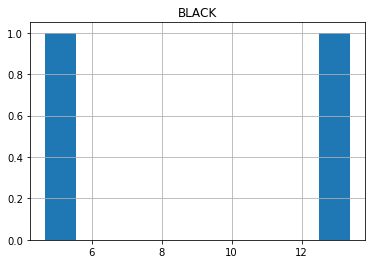

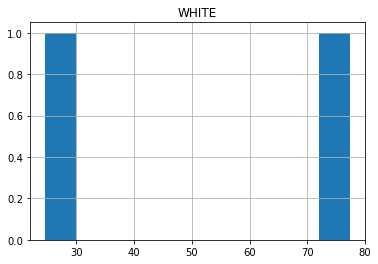

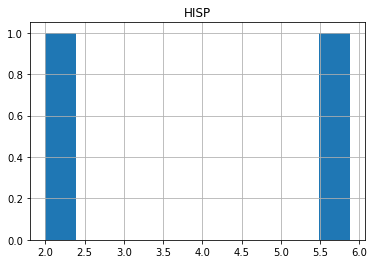

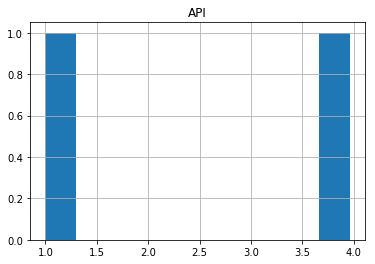

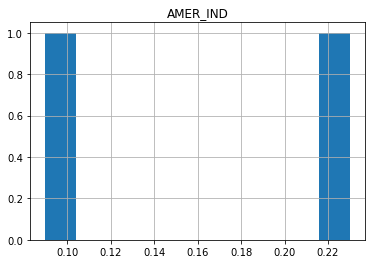

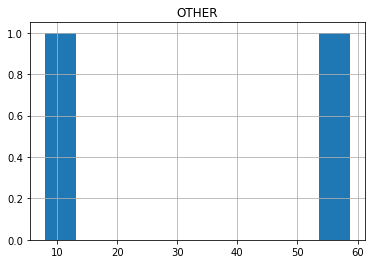

In [397]:
# histogram demographics for Deleware
char_df[char_df.STATE == 'DE'].hist(column='BLACK')
char_df[char_df.STATE == 'DE'].hist(column='WHITE')
char_df[char_df.STATE == 'DE'].hist(column='HISP')
char_df[char_df.STATE == 'DE'].hist(column='API')
char_df[char_df.STATE == 'DE'].hist(column='AMER_IND')
char_df[char_df.STATE == 'DE'].hist(column='OTHER')

# Deleware only has two univesities in the dataframe

In [398]:
pd.set_option('display.max_columns', 500)
char_df[char_df.STATE == 'DE']

,UNITID,OPEID_x,OPEID6,NAME,CITY,STATE,PUBLIC/NONPROFIT/PROFIT,STUDENT_POP,REGION,WHITE,BLACK,HISP,AMER_IND,API,OTHER,IPEDS_ID,CAMPUS_POLICE,PRIVATE_POLICE,POLICE_POP,POLICE_WHITE,POLICE_BLACK,POLICE_HISP,POLICE_AMER_IND,POLICE_API,OPER_BUDG,REQ_EDUCATION,CULT_DIV,Q47A_A,Q47A_B,Q47A_C,Q47A_D,Q47A_E,Q47A_F,Q47A_G,Q47A_H,Q47A_I,Q47A_J,Q47A_K,Q47A_L,MEET_ADVOCACY,MEET_S_GOV,MEET_S_ORG,HATE_CRIME_PERSON,VIC_ASSIST_PERSON,CSO,POLICE_OTHER,WEAPON_ARREST,DRUG_ARREST,LIQUOR_ARREST,TOTAL_ARREST,RDI,OPEID_y,name,region,tier,tier_name,type,iclevel,barrons,hbcu,scorecard_median_earnings_2011,STATE_HISP,STATE_WHITE,STATE_BLACK,STATE_AMER_IND,STATE_API,STATE_OTHER
62,130943,143100,1431,University of Delaware,Newark,DE,1,17092.0,2.0,77.35,4.67,5.88,0.09,3.96,8.05,130943,1,0,50,78.0,16.0,2.0,0.0,2.0,5764843.0,3.0,2.0,1.0,2.0,1.0,1.0,2.0,2.0,1.0,1.0,2.0,1.0,2.0,1.0,2.0,1.0,1.0,2.0,1.0,1.0,2.0,2,98,132,232,13.575640,1431,University Of Delaware,3,5,Selective public,1,1,3,0,54300.0,8.4,65.0,20.9,0.2,3.3,2.2
63,131113,794800,7948,Wilmington University,New Castle,DE,2,7005.0,2.0,24.68,13.38,2.00,0.23,1.00,58.71,131113,1,0,8,100.0,0.0,0.0,0.0,0.0,1400000.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,1.0,1.0,2.0,2.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,0.0,0,0,0,0,96.457471,7948,Wilmington University,3,6,Selective private,2,1,5,0,43000.0,8.4,65.0,20.9,0.2,3.3,2.2


Delaware has only two universities, of which University of Delaware has a majority white student population, while the other, Wilmington Univesity, has a population that is majority listed as "OTHER". When investigating the shape of the histogram, we discovered that Wilmington University is a private university that is experimental: teaches online, is mostly for research, has a very small homogenous white police force since no one lives on campus. Consequently, the data from Wilmington is an outlier.

In [399]:
pd.set_option('display.max_columns', 25)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000016C1227E080>]], dtype=object)

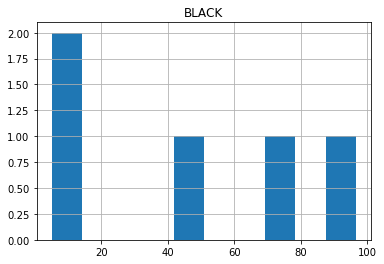

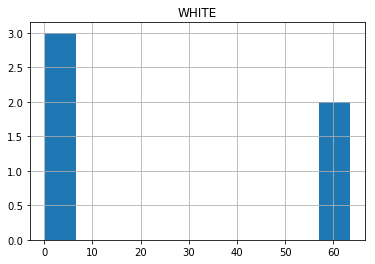

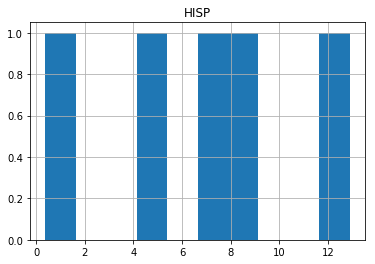

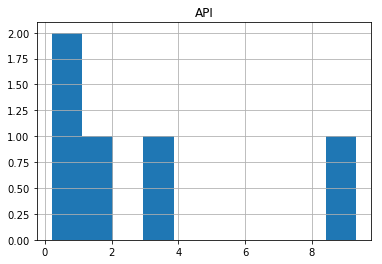

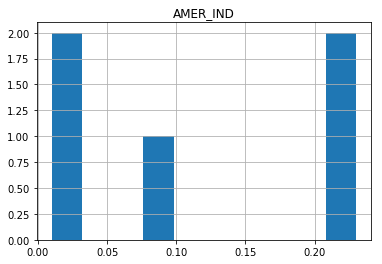

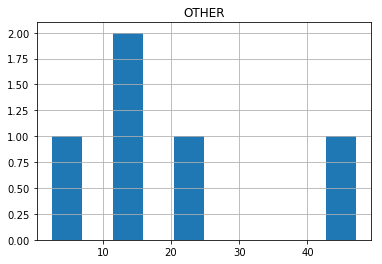

In [400]:
# histogram demographics for DC
char_df[char_df.STATE == 'DC'].hist(column='BLACK')
char_df[char_df.STATE == 'DC'].hist(column='WHITE')
char_df[char_df.STATE == 'DC'].hist(column='HISP')
char_df[char_df.STATE == 'DC'].hist(column='API')
char_df[char_df.STATE == 'DC'].hist(column='AMER_IND')
char_df[char_df.STATE == 'DC'].hist(column='OTHER')

# DC has five (2 HBCUS) and DC isn't a state 

The District of Columbia is also an outlier in the dataset since it is not within any one specific state, and out of its five universities, two of them are HBCUs.

# State specific RDI statistics 

In [401]:
# create a column for state specific RDIs
char_df['STATE_RDI'] = 0

In [402]:
# iterate through rows of the dataframe
for i, row in char_df.iterrows():
    # police demographics should come from these respective columns
    policelist = [row['POLICE_WHITE'], row['POLICE_BLACK'], row['POLICE_HISP'], row['POLICE_AMER_IND'], row['POLICE_API'], row['POLICE_OTHER']]
    # college student demographics should come from these respective columns
    statelist = [row['STATE_WHITE'], row['STATE_BLACK'], row['STATE_HISP'], row['STATE_AMER_IND'], row['STATE_API'], row['STATE_OTHER']]
    # the types of rows we should have in the dataframe
    index = ['WHITE', 'BLACK', 'HISP', 'AMER_IND', 'API', 'OTHER']
    # create the actual dataframe
    state_demographics = pd.DataFrame(index = index, columns= ['STATES', 'POLICE'])
    state_demographics['STATES'] = collegelist
    state_demographics['POLICE'] = policelist
    
    # local variable to store summation of our difference calculation statistic
    sum = 0
    # take each racial category for that school and subtract the police ratio from student ratio, then square -- sum all these together
    for index, row1 in state_demographics.iterrows():
        sum += ((row1['STATES'] - row1['POLICE'])**2)
    # square root final sum to make it more readable
    sum = sum ** (0.5)
    # store value back into respective cell in the RDI column
    char_df.loc[i, 'STATE_RDI'] = sum

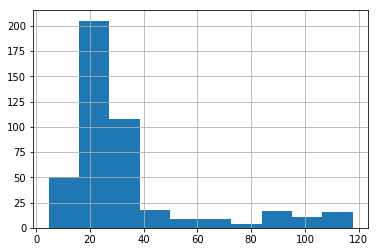

In [403]:
state_rdi_avg = (pd.Series(char_df.STATE_RDI.unique())).mean()
state_rdi_std = (pd.Series(char_df.STATE_RDI.unique())).std()

char_df['STATE_RDI'].hist()

The state RDIs are skewed right.

In [404]:
# print the national stats to compare with
print('National mean: ' + str(avg_rdi) + " | National standrd deviation: " + str(std_rdi))
print('State RDIs mean: ' + str(state_rdi_avg) + " | State RDIs standard deviation: " + str(state_rdi_std))
# initialize a dictionary with key = state, value = tuple of the state's RDI mean, std dev, dev
statewide_rdi = {}

# look through each of the states
for state in states:
    # print the mean to compare with the national state
    print(str(state) + ' mean: ' + str(char_df[char_df.STATE == state].STATE_RDI.mean()))
    # store the mean, std dev, and dev for each state population
    statewide_rdi[state] = [char_df[char_df.STATE == state].STATE_RDI.mean(), char_df[char_df.STATE == state].STATE_RDI.std(),
                            (char_df[char_df.STATE == state].STATE_RDI.mean()) - state_rdi_avg]
    

National mean: 25.945318249452118 | National standrd deviation: 15.532167977994764
State RDIs mean: 33.6187770234544 | State RDIs standard deviation: 26.58714144845887
AL mean: 46.747325131644104
AR mean: 34.367040368952495
CA mean: 26.414046582095732
CO mean: 19.870347453275333
CT mean: 17.25039138678709
DE mean: 24.043908935676324
DC mean: 108.08730652045344
FL mean: 34.31461970170158
GA mean: 45.074561889946274
IL mean: 35.103391259720894
IN mean: 22.78880302458575
IA mean: 22.629867750168646
KS mean: 24.838004302909646
KY mean: 24.247615872019974
LA mean: 58.42504599187463
MD mean: 41.93305420776074
MA mean: 20.96270026624418
MI mean: 22.839530065880925
MS mean: 55.67635600678199
MO mean: 31.313447161167613
MT mean: 32.57954266100124
NV mean: 8.378214847110161
NH mean: 32.57954266100124
NJ mean: 21.636908449863444
NM mean: 56.665190160994406
NY mean: 38.10673811043301
NC mean: 41.351480969882076
ND mean: 25.873692655260314
OH mean: 26.545767851924733
OK mean: 29.786744159535164
OR 

In [405]:
# look through each state's dev to see if anything falls outside of one std dev from the state RDIs mean
for i in statewide_rdi:
    if( (abs(statewide_rdi[i][2]) > state_rdi_std ) ):
        print(i, statewide_rdi[i])


DC [108.08730652045344, 13.877027535485313, 74.46852949699904]


# Closer Inspection of Region

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000016C0C6C8550>]], dtype=object)

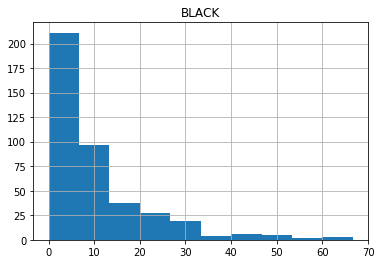

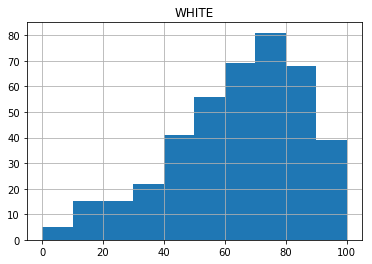

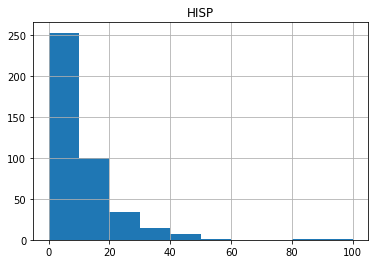

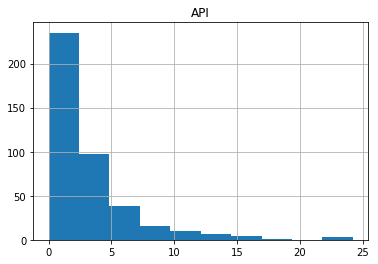

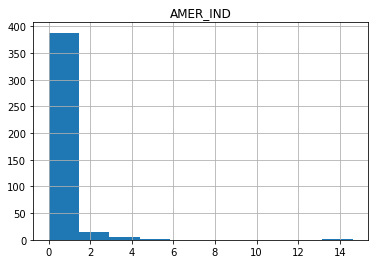

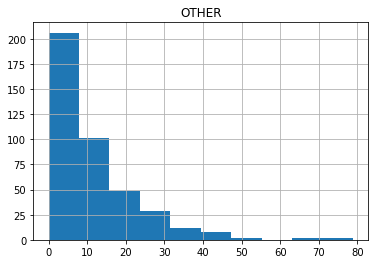

In [406]:
# histogram demographics New England (CT, ME, MA, NH, RI, VT)
demographics_df[demographics_df.REGION == 1].hist(column='BLACK')
demographics_df[demographics_df.REGION == 1].hist(column='WHITE')
demographics_df[demographics_df.REGION == 1].hist(column='HISP')
demographics_df[demographics_df.REGION == 1].hist(column='API')
demographics_df[demographics_df.REGION == 1].hist(column='AMER_IND')
demographics_df[demographics_df.REGION == 1].hist(column='OTHER')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000016C0E5A4198>]], dtype=object)

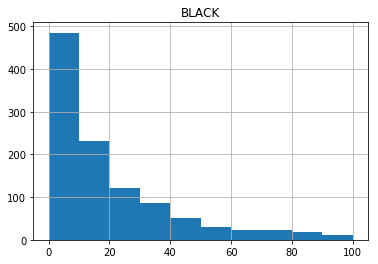

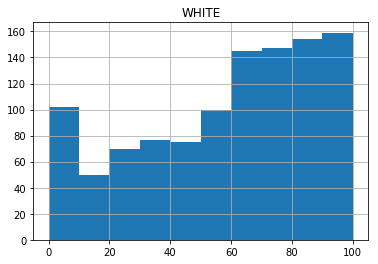

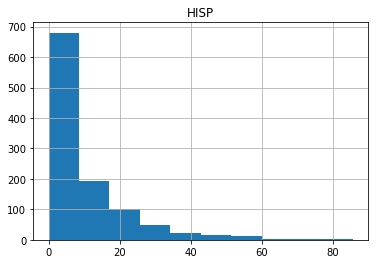

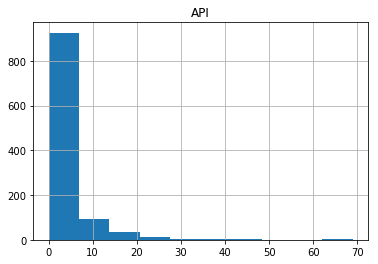

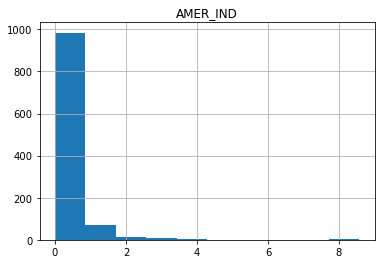

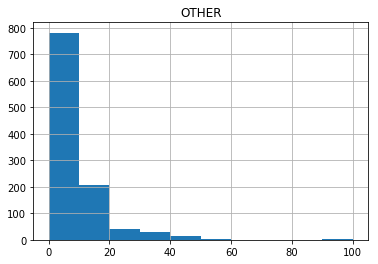

In [407]:
# histogram demographics Mid East (DE, DC, MD, NJ, NY, PA)
demographics_df[demographics_df.REGION == 2].hist(column='BLACK')
demographics_df[demographics_df.REGION == 2].hist(column='WHITE')
demographics_df[demographics_df.REGION == 2].hist(column='HISP')
demographics_df[demographics_df.REGION == 2].hist(column='API')
demographics_df[demographics_df.REGION == 2].hist(column='AMER_IND')
demographics_df[demographics_df.REGION == 2].hist(column='OTHER')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000016C11ACEE80>]], dtype=object)

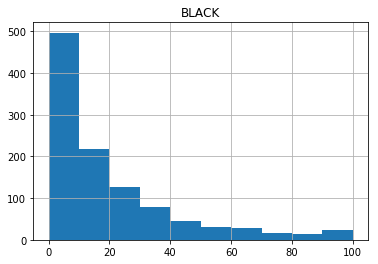

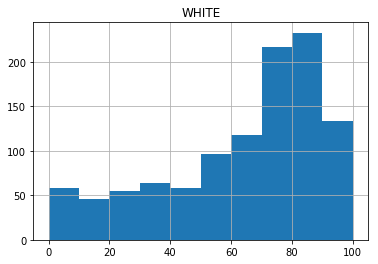

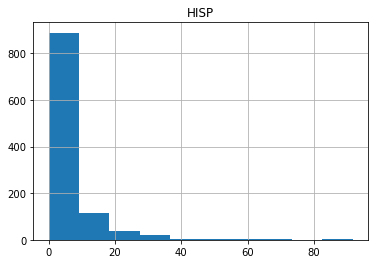

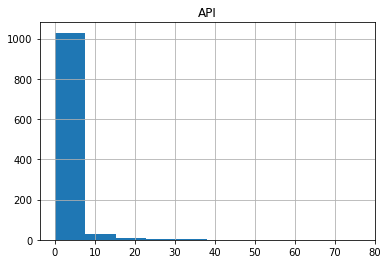

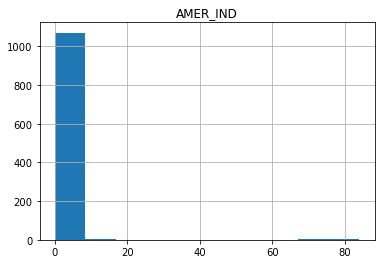

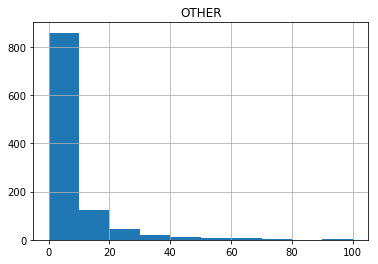

In [408]:
# histogram demographics Great Lakes (IL, IN, MI, OH, WI)
demographics_df[demographics_df.REGION == 3].hist(column='BLACK')
demographics_df[demographics_df.REGION == 3].hist(column='WHITE')
demographics_df[demographics_df.REGION == 3].hist(column='HISP')
demographics_df[demographics_df.REGION == 3].hist(column='API')
demographics_df[demographics_df.REGION == 3].hist(column='AMER_IND')
demographics_df[demographics_df.REGION == 3].hist(column='OTHER')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000016C10296208>]], dtype=object)

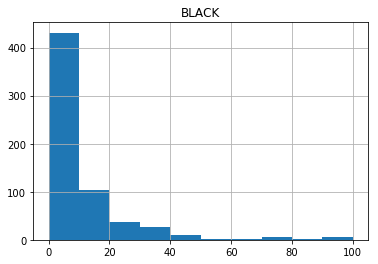

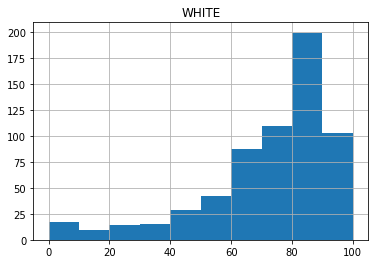

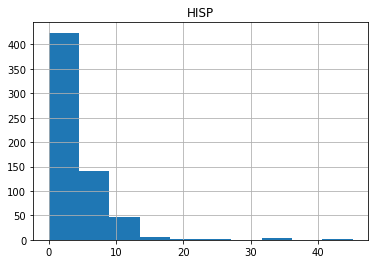

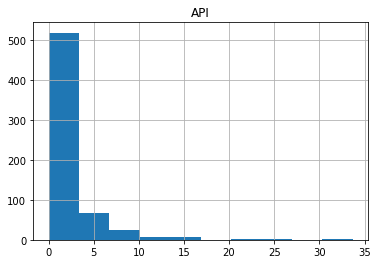

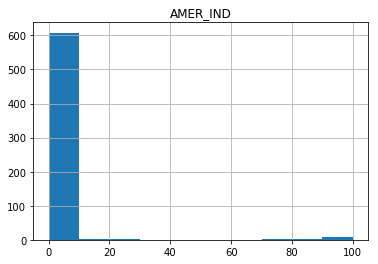

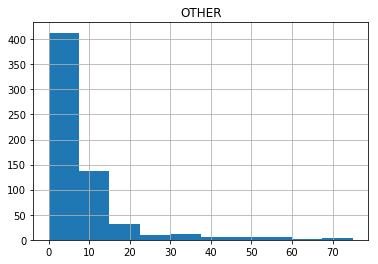

In [409]:
# histogram demographics Plains (IA, KS, MN, MO, NE, ND, SD)
demographics_df[demographics_df.REGION == 4].hist(column='BLACK')
demographics_df[demographics_df.REGION == 4].hist(column='WHITE')
demographics_df[demographics_df.REGION == 4].hist(column='HISP')
demographics_df[demographics_df.REGION == 4].hist(column='API')
demographics_df[demographics_df.REGION == 4].hist(column='AMER_IND')
demographics_df[demographics_df.REGION == 4].hist(column='OTHER')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000016C04BF8E10>]], dtype=object)

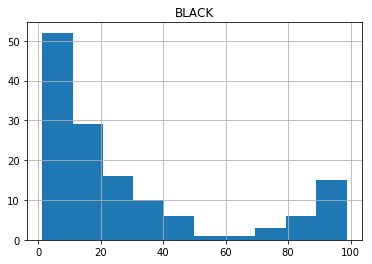

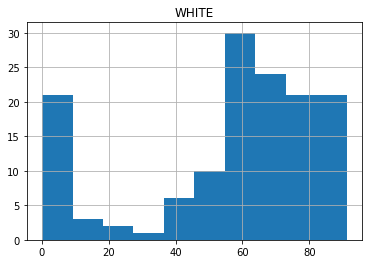

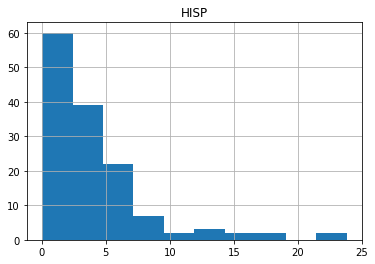

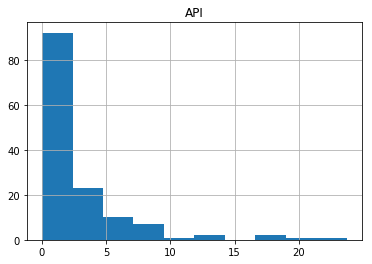

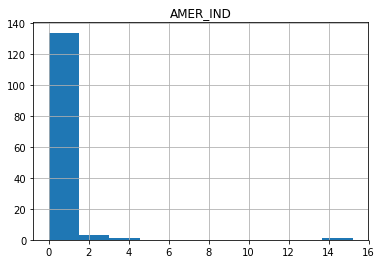

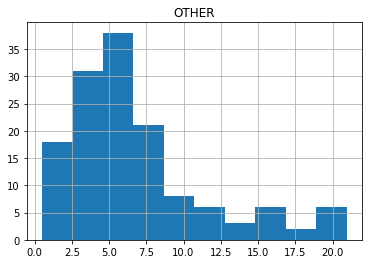

In [410]:
# histogram demographics Southeast (AL, AR, FL, GA, KY, LA, MS, NC, SC, TN, VA, WV)
char_df[char_df.REGION == 5].hist(column='BLACK')
char_df[char_df.REGION == 5].hist(column='WHITE')
char_df[char_df.REGION == 5].hist(column='HISP')
char_df[char_df.REGION == 5].hist(column='API')
char_df[char_df.REGION == 5].hist(column='AMER_IND')
char_df[char_df.REGION == 5].hist(column='OTHER')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000016C11ABA400>]], dtype=object)

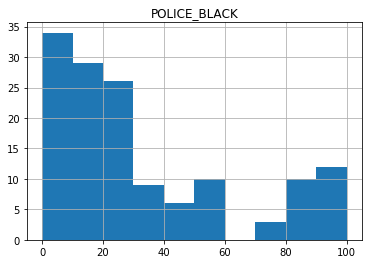

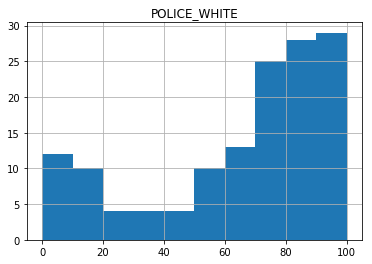

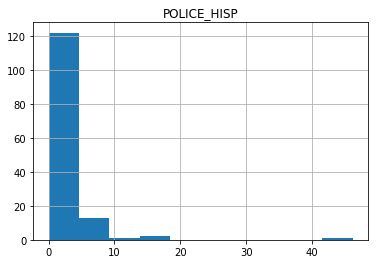

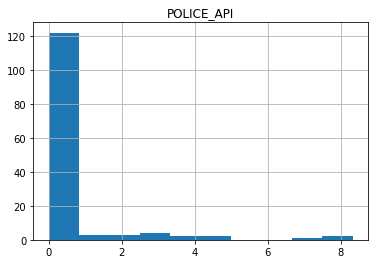

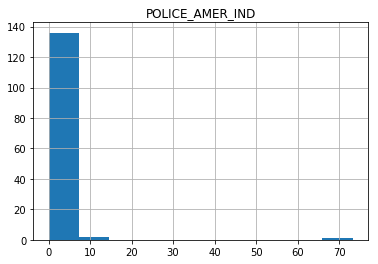

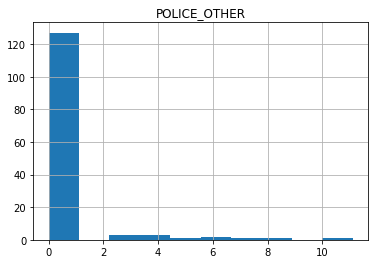

In [411]:
# histogram demographics Southeast (AL, AR, FL, GA, KY, LA, MS, NC, SC, TN, VA, WV)
char_df[char_df.REGION == 5].hist(column='POLICE_BLACK')
char_df[char_df.REGION == 5].hist(column='POLICE_WHITE')
char_df[char_df.REGION == 5].hist(column='POLICE_HISP')
char_df[char_df.REGION == 5].hist(column='POLICE_API')
char_df[char_df.REGION == 5].hist(column='POLICE_AMER_IND')
char_df[char_df.REGION == 5].hist(column='POLICE_OTHER')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000016C06F24710>]], dtype=object)

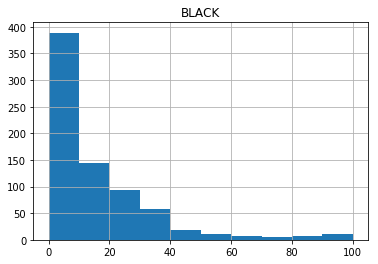

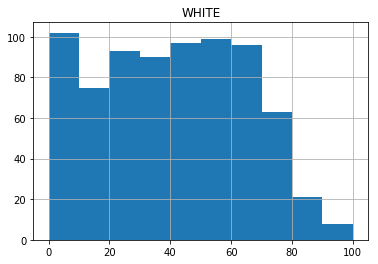

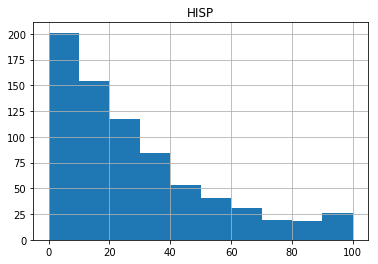

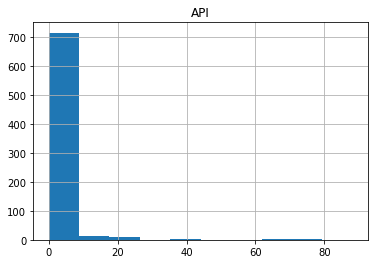

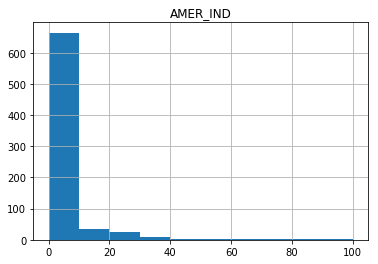

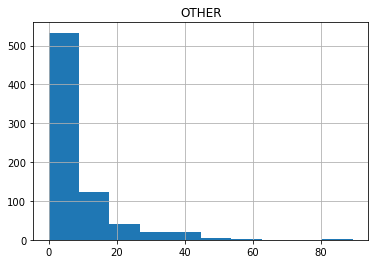

In [412]:
# histogram demographics Southwest (AZ, NM, OK, TX)
demographics_df[demographics_df.REGION == 6].hist(column='BLACK')
demographics_df[demographics_df.REGION == 6].hist(column='WHITE')
demographics_df[demographics_df.REGION == 6].hist(column='HISP')
demographics_df[demographics_df.REGION == 6].hist(column='API')
demographics_df[demographics_df.REGION == 6].hist(column='AMER_IND')
demographics_df[demographics_df.REGION == 6].hist(column='OTHER')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000016C12A74B38>]], dtype=object)

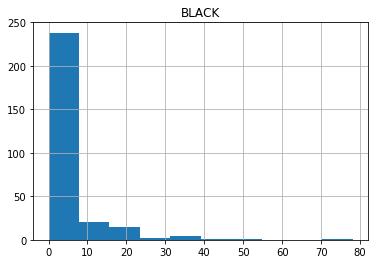

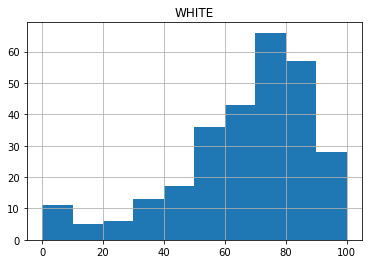

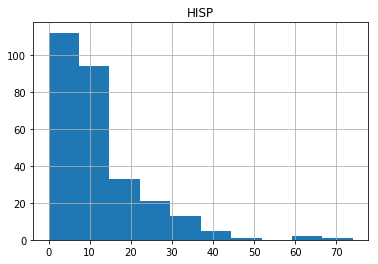

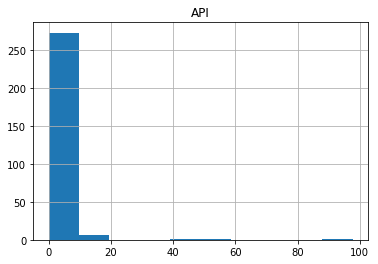

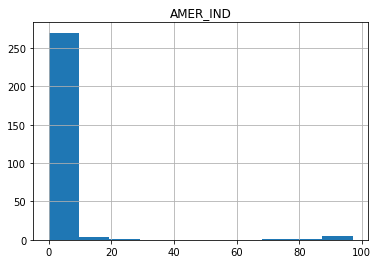

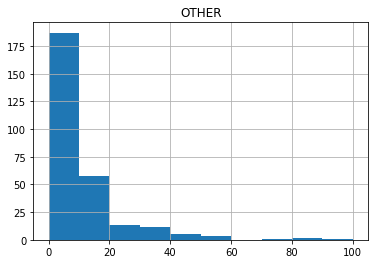

In [413]:
# histogram demographics Rocky Mountains (CO, ID, MT, UT, WY)
demographics_df[demographics_df.REGION == 7].hist(column='BLACK')
demographics_df[demographics_df.REGION == 7].hist(column='WHITE')
demographics_df[demographics_df.REGION == 7].hist(column='HISP')
demographics_df[demographics_df.REGION == 7].hist(column='API')
demographics_df[demographics_df.REGION == 7].hist(column='AMER_IND')
demographics_df[demographics_df.REGION == 7].hist(column='OTHER')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000016C0A84E2B0>]], dtype=object)

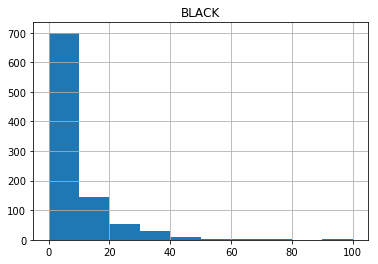

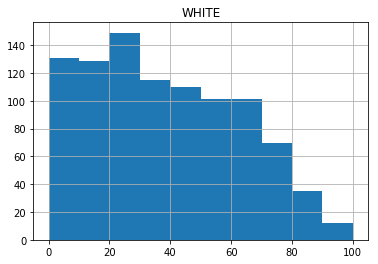

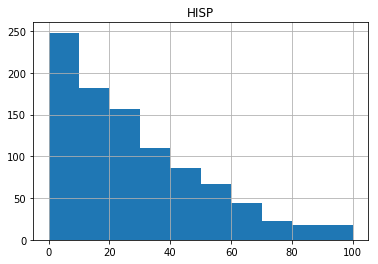

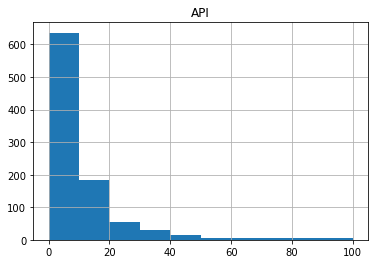

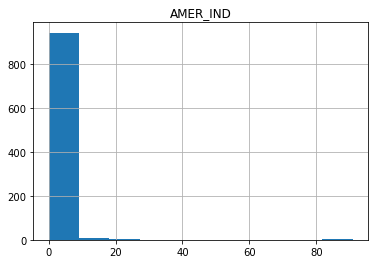

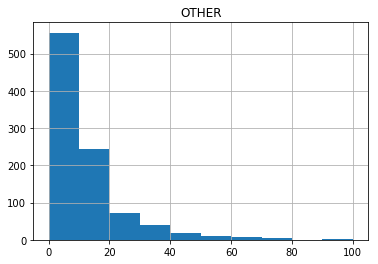

In [414]:
# histogram demographics Far West (AK, CA, HI, NV, OR, WA)
demographics_df[demographics_df.REGION == 8].hist(column='BLACK')
demographics_df[demographics_df.REGION == 8].hist(column='WHITE')
demographics_df[demographics_df.REGION == 8].hist(column='HISP')
demographics_df[demographics_df.REGION == 8].hist(column='API')
demographics_df[demographics_df.REGION == 8].hist(column='AMER_IND')
demographics_df[demographics_df.REGION == 8].hist(column='OTHER')

# Discussion: Issues and Conclusions

The biggest problem with the data was that the police data was voluntary and self-reported. This meant that private schools had no obligation to report data on their private security forces, which limited data exploration options on this spectrum. For public schools, we vastly overestimated the sizes of most schools and police forces due to our familiarity with UCPD, which is relatively large. However, even as a large school, we still only have a police size of around 30 officers. This means that the vast majority of the police forces in our data set had even less. Additionally, our data may have a couple of pitfalls because police departments and universities self-reported the data; there is a lack of oversight to ensure the data's authenticity. A university may be underreporting incidents or have poor enforcement that is not represented in the data. Additionally, a confounding variable that may affect our results is differences in practices and protocol across departments, university systems, states, and counties. A large centralized system such as UCPD will likely differ in practices from a CSU's police department or a private institution's department, and this could affect the weapons they require or budget they request.

In terms of our analysis, we originally aimed to use a chi-square test of homogeneity to measure the degree of demographic representation between the campus police and students. However, this proved to be problematic since the expected counts were typically below five, so the test could not be appropriately conducted. Consequently, we switched to developing our own measure of diversity through our "Racial Diversity Index" which used simple differences and summations. However, it is possible that his was not the best measure to use, and recalculating this number might result in different results.

Furthermore, we severely underestimated the high representation of white people across most colleges in America. This meant that even if the police force was mostly white, it still lead to mostly low RDIs since most colleges are largely comprised of white students. So while these low RDIs may mean representation was pretty accurate, this is only due to the lack of diversity within the college campus to begin with.

Overall, our graphs did not demonstrate any particular correlation between RDI and other policing factors, leading us to believe that racial representation in college police forces does not have a strong effect on any specific part of policing. Instead, there are other potential confounding factors such as size of the college, area, private/public, and overall budget that play a bigger role in how policing is done. These would be very interesting points of analysis to look into for the future. However, it is important to note that we were only able to observe tangible differences in terms of policing, such as different budgets or equipment or number of arrests, but not intangible policing such as demeanor of officers and overall interactions with students which definitely have the possibility of being affected by factors such as race.  